In [2]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline
import yaml


# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline



cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# saved = {'Pk_quijote_2gpc':Pk_quijote_2gpc.Pk[:,0],
#         'lgMass_quijote_2gpc':lgMass_quijote_2gpc, 'Pk_quijote_1gpc_HR':Pk_quijote_1gpc_HR.Pk[:,0], 'lgMass_quijote_1gpc_HR':lgMass_quijote_1gpc_HR,
#         'Pk_quijote_1gpc_LR':Pk_quijote_1gpc_LR.Pk[:,0], 'lgMass_quijote_1gpc_LR':lgMass_quijote_1gpc_LR, 'Pk_mock_2gpc':Pk_mock.Pk[:,0], 'lgMass_mock_2gpc':lgMass_mock,
#         'k_quijote_2gpc':Pk_quijote_2gpc.k3D, 'k_quijote_1gpc_HR':Pk_quijote_1gpc_HR.k3D, 'k_quijote_1gpc_LR':Pk_quijote_1gpc_LR.k3D}

# dill.dump(saved, open('/mnt/home/spandey/ceph/CHARM/data/Pk_quijote_mock_2gpc.pk', 'wb'))
import dill
saved = dill.load(open('/mnt/home/spandey/ceph/CHARM/data/Pk_quijote_mock_2gpc.pk', 'rb'))
k_quijote_2gpc = saved['k_quijote_2gpc']
Pk_quijote_2gpc = saved['Pk_quijote_2gpc']
Pk_mock_2gpc = saved['Pk_mock_2gpc']

import dill
saved = dill.load(open('/mnt/home/spandey/ceph/CHARM/data/lgMass_quijote_mock_2gpc.pk', 'rb'))
lgMass_quijote_2gpc = saved['lgMass_quijote_2gpc']
lgMass_mock_2gpc = saved['lgMass_mock_2gpc']

# saved = {'Pk_quijote_3gpc':Pk_quijote_3gpc.Pk[:,0], 'lgMass_quijote_3gpc':lgMass_quijote_3gpc, 'Pk_quijote_2gpc':Pk_quijote_2gpc.Pk[:,0],
#         'lgMass_quijote_2gpc':lgMass_quijote_2gpc, 'Pk_quijote_1gpc_HR':Pk_quijote_1gpc_HR.Pk[:,0], 'lgMass_quijote_1gpc_HR':lgMass_quijote_1gpc_HR,
#         'Pk_quijote_1gpc_LR':Pk_quijote_1gpc_LR.Pk[:,0], 'lgMass_quijote_1gpc_LR':lgMass_quijote_1gpc_LR, 'Pk_mock_3gpc':Pk_mock.Pk[:,0], 'lgMass_mock_3gpc':lgMass_mock,
#         'k_quijote_3gpc':Pk_quijote_3gpc.k3D, 'k_quijote_2gpc':Pk_quijote_2gpc.k3D, 'k_quijote_1gpc_HR':Pk_quijote_1gpc_HR.k3D, 'k_quijote_1gpc_LR':Pk_quijote_1gpc_LR.k3D}
# import dill
# dill.dump(saved, open('/mnt/home/spandey/ceph/CHARM/data/Pk_quijote_mock_3gpc.pk', 'wb'))
saved = dill.load(open('/mnt/home/spandey/ceph/CHARM/data/Pk_quijote_mock_3gpc.pk', 'rb'))
k_quijote_3gpc = saved['k_quijote_3gpc']
Pk_quijote_3gpc = saved['Pk_quijote_3gpc']
Pk_mock_3gpc = saved['Pk_mock_3gpc']
Pk_quijote_1gpc_HR = saved['Pk_quijote_1gpc_HR']
Pk_quijote_1gpc_LR = saved['Pk_quijote_1gpc_LR']
k_quijote_1gpc_HR = saved['k_quijote_1gpc_HR']

saved = dill.load(open('/mnt/home/spandey/ceph/CHARM/data/lgMass_quijote_mock_3gpc.pk', 'rb'))
lgMass_quijote_3gpc = saved['lgMass_quijote_3gpc']
lgMass_mock_3gpc = saved['lgMass_mock_3gpc']
# lgMass_quijote_1gpc_HR = saved['lgMass_quijote_1gpc_HR']
# lgMass_quijote_1gpc_LR = saved['lgMass_quijote_1gpc_LR']



In [37]:
# np.log10(5e12)


In [58]:
from colossus.cosmology import cosmology
params = {'flat': True, 'H0': 67.11, 'Om0': 0.3175, 'Ob0': 0.049, 'sigma8': 0.834, 'ns': 0.9624}
cosmo = cosmology.setCosmology('myCosmo', **params)
from colossus.lss import mass_function

lgMass_edges = np.linspace(12.5, 14.9, 60)
lgMass_bin = 0.5 * (lgMass_edges[1:] + lgMass_edges[:-1])
delta_b = 0.5*(lgMass_bin[1] - lgMass_bin[0])
# lgMass_edges = np.insert(lgMass_edges,0, lgMass_bin[0] - delta_b)
# lgMass_edges = np.insert(lgMass_edges,len(lgMass_edges), lgMass_bin[-1] + delta_b)


# lgMass_edges_quijote = np.linspace(13.7, 15.0, 100)
lgMass_edges_quijote = lgMass_edges[np.where((lgMass_edges > 13.7) & (lgMass_edges < 14.9))[0]]
lgMass_bin_quijote = 0.5 * (lgMass_edges_quijote[1:] + lgMass_edges_quijote[:-1])
delta_b_quijote = 0.5*(lgMass_bin_quijote[1] - lgMass_bin_quijote[0])
# lgMass_hist_mock, _ = np.histogram(lgMass_mock, bins=lgMass_edges)
lgMass_hist_quijote_3gpc_all, _ = np.histogram(lgMass_quijote_3gpc, bins=lgMass_edges_quijote)
# lgMass_hist_quijote_2gpc_all, _ = np.histogram(lgMass_quijote_2gpc, bins=lgMass_edges)


lgMass_edges_mock = lgMass_edges[np.where((lgMass_edges > 12.85) & (lgMass_edges < 14.9))[0]]
lgMass_bin_mock = 0.5 * (lgMass_edges_mock[1:] + lgMass_edges_mock[:-1])
delta_b_mock = 0.5*(lgMass_bin_mock[1] - lgMass_bin_mock[0])
lgMass_hist_mock_3gpc_all, _ = np.histogram(lgMass_mock_3gpc, bins=lgMass_edges_mock)
# lgMass_hist_mock_2gpc_all, _ = np.histogram(lgMass_mock_2gpc, bins=lgMass_edges)


# lgMass_hist_quijote_1gpc_HR, _ = np.histogram(lgMass_quijote_1gpc_HR, bins=lgMass_edges)
# lgMass_hist_quijote_1gpc_LR_all, _ = np.histogram(lgMass_1gpc_all, bins=lgMass_edges)

lnMass_edges = np.log(10**lgMass_edges)
dlnMass_bin = lnMass_edges[1] - lnMass_edges[0]
hmf = mass_function.massFunction(10**lgMass_bin, float(0.5), mdef = '200c', model = 'tinker08', q_out = 'dndlnM')
N_theory = hmf * dlnMass_bin * (3000)**3



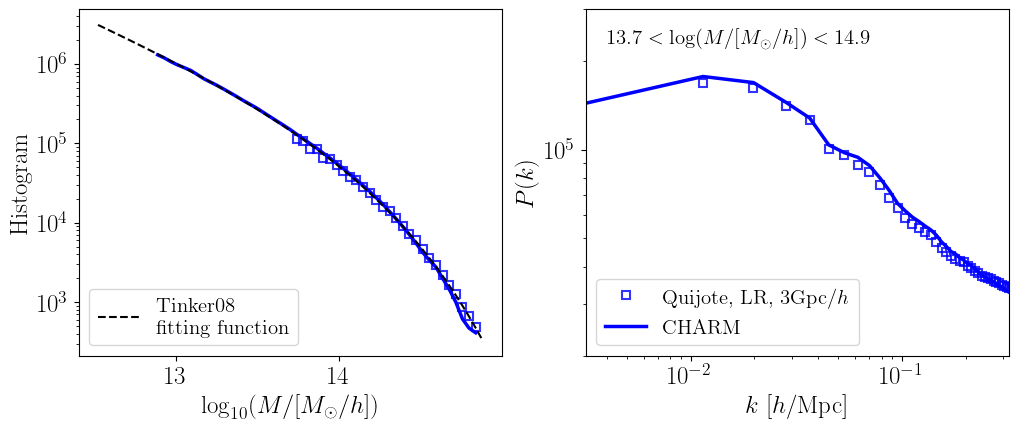

In [65]:
# indsel = np.arange(0, Pk_mock_all.shape[0], 1)

from matplotlib import cm

#normalize item number values to colormap
# norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)

fig, axes = pl.subplots(1, 2, figsize=(12, 4.5))
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.2, hspace=0.1)


# for j1 in range(2):
# axes = axes_all[j1]
# i = 0
for i in range(2):
    # axes[i].axhline(1, color='k', ls='--', lw=2.0)
    if i == 0:
        # bin_cents_M = np.linspace(13.7, 14.9, 15)[1:-1]
        # bin_edges_M = 0.5*(bin_cents_M[1:] + bin_cents_M[:-1])
        # delta_b = 0.5*(bin_cents_M[1] - bin_cents_M[0])
        # bin_edges_M = np.insert(bin_edges_M,0, bin_cents_M[0] - delta_b)
        # bin_edges_M = np.insert(bin_edges_M,len(bin_edges_M), bin_cents_M[-1] + delta_b)

        # hist_quijote_3gpc, _ = np.histogram(lgMass_quijote_3gpc, bins=bin_edges_M)
        # hist_mock_3gpc, _ = np.histogram(lgMass_mock_3gpc, bins=bin_edges_M)
        # hist_quijote_2gpc, _ = np.histogram(lgMass_quijote_2gpc, bins=bin_edges_M)
        # hist_mock_2gpc, _ = np.histogram(lgMass_mock_2gpc, bins=bin_edges_M)
        # hist_quijote_1gpc_HR, _ = np.histogram(lgMass_quijote_1gpc_HR, bins=bin_edges_M)
        # hist_quijote_1gpc_LR, _ = np.histogram(lgMass_quijote_1gpc_LR, bins=bin_edges_M)

        axes[i].plot(lgMass_bin_quijote, lgMass_hist_quijote_3gpc_all, markerfacecolor='none', markeredgecolor='b',markeredgewidth=1.5, ls='', marker='s', alpha=0.8)
        axes[i].plot(lgMass_bin_mock, lgMass_hist_mock_3gpc_all, 'b-', lw=2.5)
        axes[i].plot(lgMass_bin, N_theory, 'k', ls='--', marker='', label=r'Tinker08' +  '\n' + 'fitting function')
        # axes[i].plot(lgMass_bin, lgMass_hist_mock_2gpc_all, 'r-', label=r'CHARM, 2Gpc/$h$')
        # axes[i].plot(bin_cents_M, hist_quijote_1gpc_HR, 'orange', label=r'Quijote, HR, 1Gpc/$h$')
        # axes[i].plot(bin_cents_M, hist_quijote_1gpc_LR, 'green', label=r'Quijote, LR, 1Gpc/$h$')
        axes[i].set_yscale('log')
        axes[i].set_xlabel(r'$\log_{10}(M/[M_{\odot}/h])$', fontsize=18)
        axes[i].set_ylabel(r'Histogram', fontsize=18)
        axes[i].legend(fontsize=15, loc='lower left')

            
    if i == 1:
        axes[i].plot(k_quijote_3gpc[::4], Pk_quijote_3gpc[::4], markerfacecolor='none', markeredgecolor='b', ls='', marker='s',markeredgewidth=1.5, label=r'Quijote, LR, 3Gpc/$h$', alpha=0.8)
        axes[i].plot(k_quijote_3gpc[::4], Pk_mock_3gpc[::4], 'b-', label=r'CHARM', lw=2.5)
        # axes[i].plot(k_quijote_2gpc, Pk_quijote_2gpc, 'r', ls='', marker='s', label=r'Quijote, LR, 2Gpc/$h$', alpha=0.6)
        # axes[i].plot(k_quijote_2gpc, Pk_mock_2gpc, 'r-', label=r'CHARM 2Gpc/$h$')
        # axes[i].plot(k_quijote_1gpc_HR, Pk_quijote_1gpc_HR, 'orange', label=r'Quijote, HR, 1Gpc/$h$')
        # axes[i].plot(k_quijote_1gpc_HR, Pk_quijote_1gpc_LR, 'orange', label=r'Quijote, HR, 1Gpc/$h$')
        axes[i].set_yscale('log')
        axes[i].set_xlim(0.0032, 0.32)
        axes[i].set_ylim(2e4, 3e5)        
        axes[i].set_xscale('log')
        axes[i].set_xlabel(r'$k$ [$h$/Mpc]', fontsize=18)
        axes[i].set_ylabel(r'$P(k)$', fontsize=18)
        label = r'$13.7 < \log(M/[M_{\odot}/h]) < 14.9$'                
        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=15)
        axes[i].legend(fontsize=15)

    axes[i].tick_params(axis='both', which='major', labelsize=18)
    axes[i].tick_params(axis='both', which='minor', labelsize=18)

# cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$\sigma_8$', pad=0.02)
# # set labelsize and colorbar location:
# # cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=21)
# cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
#     # 
fig.savefig('/mnt/home/spandey/ceph/CHARM/results/paper_plots/compare_2gpc_3gpc_v2.pdf', bbox_inches='tight')


